In [1]:
import numpy as np 
from PIL import Image

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
image = Image.open('cat1.jpg')

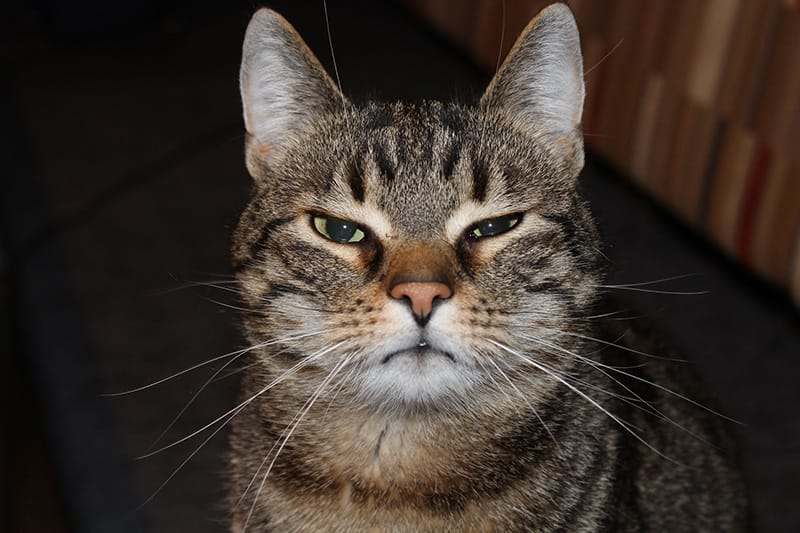

In [7]:
image

In [8]:
image.size

(800, 533)

In [9]:
data = np.array(image)

In [10]:
data.shape

(533, 800, 3)

In [186]:
data.dtype

dtype('uint8')

In [11]:
r = data[:,:,0]
g = data[:,:,1]
b = data[:,:,2]

In [12]:
pca = PCA()

In [123]:
r_pca = pca.fit_transform(r)
g_pca = pca.fit_transform(g)
b_pca = pca.fit_transform(b)

In [21]:
from scipy.linalg import eigh

In [96]:
values_r,vectors_r = eigh(r_pca)
values_g,vectors_b = eigh(g_pca)
values_b,vectors_b = eigh(b_pca)

In [97]:
vectors_r.shape

(533, 533)

In [100]:
new_r = np.dot(data[:,:,0].T,vectors_r)
new_g = np.dot(data[:,:,1].T,vectors_g)
new_b = np.dot(data[:,:,2].T,vectors_b)

In [140]:
reconst_r = np.dot(vectors_r,new_r.T)
reconst_g = np.dot(vectors_g,new_r.T)
reconst_b = np.dot(vectors_b,new_r.T)

In [154]:
x = np.concatenate((reconst_r.ravel(),reconst_g.ravel()))

In [156]:
y = np.concatenate((x,reconst_b.ravel()))

In [174]:
z = np.dstack((reconst_r,reconst_g,reconst_b))

In [193]:
z1 = np.dstack((reconst_r.astype(np.uint8),reconst_g.astype(np.uint8),reconst_b.astype(np.uint8)))

In [195]:
Image.frombytes(z)

TypeError: frombytes() missing 2 required positional arguments: 'size' and 'data'

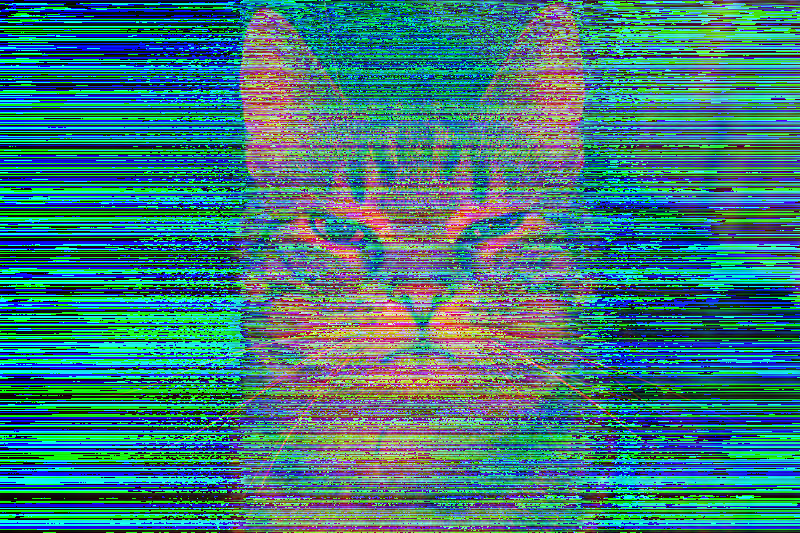

In [192]:
Image.fromarray(z.astype('uint8'), mode=None)